# Custom top-K accuracy metric

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y_pred = pd.DataFrame([[0.3, 0.29, 0.41],
                      [0.31, 0.59, 0.1],
                      [0.0, 0.6, 0.4],
                      [0.42, 0.48, 0.1],
                      [0.4, 0.3, 0.3]],
                      columns = ["tree", "grass", "flower"])
y_true = pd.DataFrame([[0, 0, 1],
                      [0, 1, 0],
                      [0, 1, 1],
                      [1, 1, 0],
                      [1, 1, 1]],
                      columns = ["tree", "grass", "flower"])

In [3]:
assert y_true.shape == y_pred.shape
N, C = y_true.shape

In [4]:
y_true

,tree,grass,flower
0,0,0,1
1,0,1,0
2,0,1,1
3,1,1,0
4,1,1,1


## Get the s-scores

In [5]:
y_pred

,tree,grass,flower
0,0.30,0.29,0.41
1,0.31,0.59,0.10
2,0.00,0.60,0.40
3,0.42,0.48,0.10
4,0.40,0.30,0.30


## Get the d-scores

In [6]:
t = 0.3
temp = y_pred[y_true == 1].applymap(lambda x: 1 if x >= t else 0)
temp

,tree,grass,flower
0,0,0,1
1,0,1,0
2,0,1,1
3,1,1,0
4,1,1,1


## Calculate the average number of correctly predicted species for a given threshold

In [7]:
average = temp.values.sum()/N
average

1.8

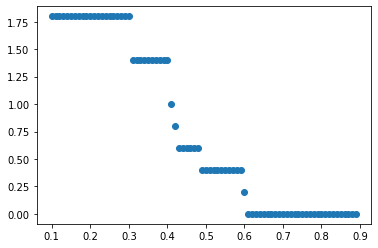

In [8]:
thresholds = []
averages = []
for x in np.arange(0.1, 0.9, 0.01):
    t = round(x,2)
    temp = y_pred[y_true == 1].applymap(lambda x: 1 if x >= t else 0)
    average = temp.values.sum()/N
    thresholds.append(t)
    averages.append(average)

print()
plt.scatter(thresholds, averages)

## Find minimum threshold given K value

In [9]:
K = 1
index = min([index for index, value in enumerate(averages) if value <= K])
t_min = thresholds[index]
t_min

0.41

## Turning this into functions

In [10]:
def compute_average(y_true, y_pred, t):
    N, C = y_pred.shape
    temp = y_pred[y_true == 1].applymap(lambda x: 1 if x >= t else 0)
    average = temp.values.sum()/N
    return average

def find_t_min(y_true, y_pred, K, rate, t):
    average = compute_average(y_true, y_pred, t)
    while average <= K:
        t = rate*t
        average = compute_average(y_true, y_pred, t)
    t_min = t/rate
    average = compute_average(y_true, y_pred, t_min)
    return t_min, average

def compute_accuracy(y_true, y_pred, t_min):
    N, C = y_pred.shape
    temp = y_pred[y_true == 1].applymap(lambda x: 1 if x >= t_min else 0)
    return temp.values.sum()/(N*C)

def custom_metric(y_true, y_pred, K, rate, t):
    t_min, average = find_t_min(y_true, y_pred, K, rate, t)
    accuracy = compute_accuracy(y_true, y_pred, t_min)
    return t_min, average, accuracy   

In [11]:
compute_average(y_true, y_pred, t = 0.7)

0.0

In [12]:
find_t_min(y_true, y_pred, K = 1, rate = 0.98, t = 1)

(0.4028778642734252, 1.0)

## Test running on dummy y_pred, y_true

In [13]:
%%time

t_min, average = find_t_min(y_true, y_pred, K = 1, rate = 0.98, t = 1)
accuracy = compute_accuracy(y_true, y_pred, t_min)
t_min, average, accuracy

CPU times: user 101 ms, sys: 0 ns, total: 101 ms
Wall time: 95.1 ms


(0.4028778642734252, 1.0, 0.3333333333333333)

In [14]:
%%time

t_min, average, accuracy = custom_metric(y_true, y_pred, K = 1, rate = 0.98, t = 1)
t_min, average, accuracy

CPU times: user 98.2 ms, sys: 9.59 ms, total: 108 ms
Wall time: 98.8 ms


(0.4028778642734252, 1.0, 0.3333333333333333)